<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula09a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, len(train_labels), train_labels, test_images.shape, len(test_labels), test_labels

((60000, 28, 28),
 60000,
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (10000, 28, 28),
 10000,
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

def define_architecture(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)
  x = layers.Dense(512, activation="relu")(inputs)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_architecture(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28*28))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
(train_images, train_labels), (test_images, test_labels)
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(np.array(test_labels), ypred)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2671 - accuracy: 0.9225
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0515 - accuracy: 0.9840
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9755

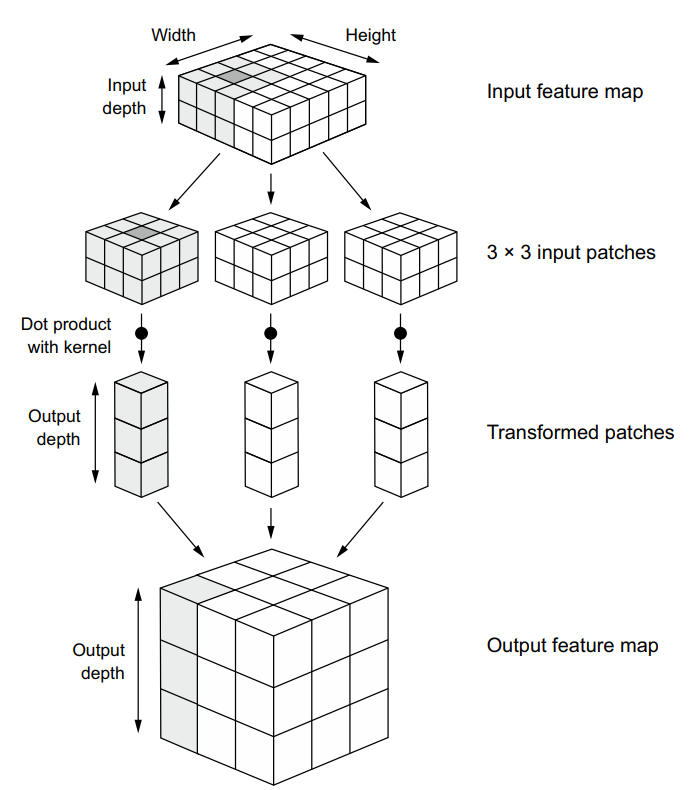

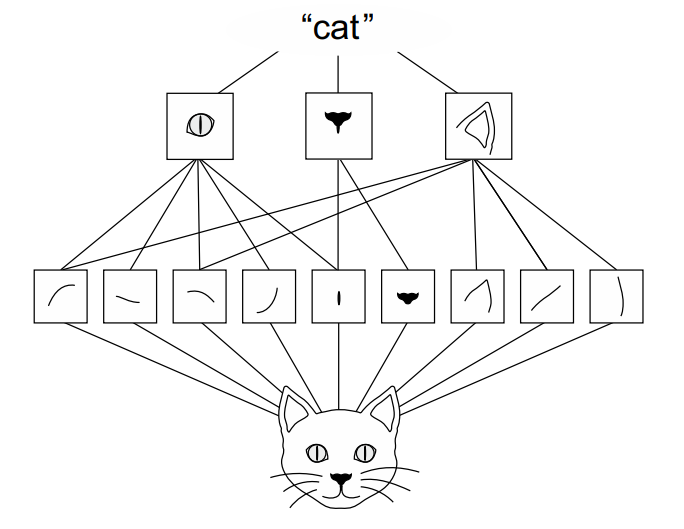

In [19]:
def define_architecture(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)  
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPool2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

model = define_architecture((28,28,1), 10)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 128)         7385

In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_architecture(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
(train_images, train_labels), (test_images, test_labels)
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(np.array(test_labels), ypred)

Epoch 1/5
469/469 [==============================] - 36s 75ms/step - loss: 0.2145 - accuracy: 0.9328
Epoch 2/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0541 - accuracy: 0.9834
Epoch 3/5
469/469 [==============================] - 35s 75ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 4/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 2s 6ms/step


0.9915

In [22]:
(2.45/0.85)*100

288.2352941176471